Unnecessary and redundant features not only slow down the algo,but they also affect the performance of the algo.

# What is Filter method?

Filters methods belong to the category of feature selection methods that select features independently of the machine learning algorithm model. This is one of the biggest advantages of filter methods. Features selected using filter methods can be used as an input to any machine learning models. Another advantage of filter methods is that they are very fast. Filter methods are generally the first step in any feature selection pipeline.

Univariate vs Multivariate:
========================

==>Univariate and multivariate represent two approaches to statistical analysis. Univariate involves the analysis of a single variable while multivariate analysis examines two or more variables. Most multivariate analysis involves a dependent variable and multiple independent variables. Most univariate analysis emphasizes description while multivariate methods emphasize hypothesis testing and explanation. Although univariate and multivariate differ in function and complexity, the two methods of statistical analysis share similarities as well.

==>Univariate analysis is useful to remove constant and quasi-constant features from the data. They may not be useful to remove the redundant features,as relationships of features are not taking into consideration.

==> Multivariate analysis is useful to remove the redundant features from the data,as mutual relationships are taking into consideration. Also we can find out correlation and duplicate features.

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [3]:
#Loading data with limited rows
data = pd.read_csv('D:\Data Science\dataset\santander.csv',nrows=2000)

In [4]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:

def unistats(df):
    import pandas as pd
    op_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mean','Mode','Min','25%','Median','50%','75%','Max','std','Skew','Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            op_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,df[col].mean(),df[col].mode().values[0],df[col].min(),df[col].quantile(.25),df[col].median(),df[col].quantile(.50),df[col].quantile(.75),df[col].max(),df[col].std(),df[col].skew(),df[col].skew()]
        else:
            op_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,'--',df[col].mode().values[0],'--','--','--','--','--','--','--','--','--']
    return op_df.sort_values(by=['Dtype','Skew','Unique'],ascending=False)

In [6]:
unistats(data)

,Count,Missing,Unique,Dtype,Mean,Mode,Min,25%,Median,50%,75%,Max,std,Skew,Kurt
saldo_medio_var44_hace3,2000,0,2,float64,0.433290,0,0,0.0,0.0,0.0,0.0,866.58,19.377318,44.721360,44.721360
saldo_medio_var33_ult1,2000,0,2,float64,7.525260,0,0,0.0,0.0,0.0,0.0,15050.5,336.539858,44.721360,44.721360
saldo_var6,2000,0,2,float64,5.988300,0,0,0.0,0.0,0.0,0.0,11976.6,267.804917,44.721360,44.721360
saldo_var29,2000,0,2,float64,5.988300,0,0,0.0,0.0,0.0,0.0,11976.6,267.804917,44.721360,44.721360
imp_aport_var17_ult1,2000,0,2,float64,7.178130,0,0,0.0,0.0,0.0,0.0,14356.3,321.015733,44.721360,44.721360
imp_trasp_var17_in_ult1,2000,0,2,float64,7.178130,0,0,0.0,0.0,0.0,0.0,14356.3,321.015733,44.721360,44.721360
saldo_medio_var33_hace2,2000,0,2,float64,7.632975,0,0,0.0,0.0,0.0,0.0,15266,341.357019,44.721360,44.721360
saldo_medio_var33_hace3,2000,0,2,float64,1.000080,0,0,0.0,0.0,0.0,0.0,2000.16,44.724937,44.721360,44.721360
saldo_medio_var33_ult3,2000,0,2,float64,5.386110,0,0,0.0,0.0,0.0,0.0,10772.2,240.874162,44.721360,44.721360
saldo_var33,2000,0,2,float64,7.578330,0,0,0.0,0.0,0.0,0.0,15156.7,338.913221,44.721360,44.721360


In [7]:
x = data.drop('TARGET',axis=1)

In [8]:
y = data['TARGET']

In [9]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0,stratify=y)


In [10]:
type(x_train)

pandas.core.frame.DataFrame

### Constant features removal

VarianceThreshold:

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the
desired outputs (y), and can thus be used for unsupervised learning.

In [11]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [12]:
constant_filter.get_support().sum()


261

In [13]:
constatnt_list = [not temp for temp in constant_filter.get_support()]
constatnt_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [80]:
def getConstantFeatures(df):

    #c_df = []
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(df)
    #count =  constant_filter.get_support().sum()
    #if count > 0:
    const_list = [not temp for temp in constant_filter.get_support()]
    c_df = df.columns[const_list]
    c_list = c_df.tolist()
    return c_list
print(type(getConstantFeatures(data)))

<class 'list'>


In [14]:
x_train.columns[constatnt_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27',
       ...
       'saldo_medio_var13_medio_hace3', 'saldo_medio_var13_medio_ult1',
       'saldo_medio_var13_medio_ult3', 'saldo_medio_var17_hace3',
       'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3',
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3'],
      dtype='object', length=109)

In [15]:
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [72]:
type(x_train.columns[constatnt_list])

pandas.core.indexes.base.Index

In [16]:
x_train_filter.shape,x_test_filter.shape,x_train.shape

((1600, 261), (400, 261), (1600, 370))

### Quasi constant features removal

Removal of almost constant features, means which features has almost same value throughout the sample.

In [17]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)


In [18]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [19]:
quasi_constant_filter.get_support().sum()

223

In [20]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [21]:
x_train_quasi_filter.shape, x_test_quasi_filter.shape

((1600, 223), (400, 223))

### Remove duplicate features

In [22]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [23]:
type(x_test_T)

numpy.ndarray

In [24]:
x_train_T = pd.DataFrame(x_train_T)

In [25]:
x_test_T = pd.DataFrame(x_test_T)

In [26]:
x_train_T.shape,x_test_T.shape

((223, 1600), (223, 400))

In [27]:
x_train_T.duplicated().sum()

23

In [28]:
features_duplicated = x_train_T.duplicated()

In [29]:
duplicate_list = [not index for index in features_duplicated]

In [30]:
duplicate_list

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,


In [31]:
x_train_unique = x_train_T[duplicate_list].T
x_test_unique = x_test_T[duplicate_list].T

In [32]:
x_train_unique.shape

(1600, 200)

### Model Building

In [33]:
def run_classifier(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=90,random_state=0,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ')
    print(accuracy_score(y_test,y_pred))


In [34]:
%%time
run_classifier(x_train_unique,x_test_unique,y_train,y_test)

Accuracy: 
0.955
Wall time: 752 ms


In [35]:
%%time
run_classifier(x_train,x_test,y_train,y_test)

Accuracy: 
0.9575
Wall time: 468 ms


### What is correlation?

Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.
For example, two variables which are linearly dependent (say, x and y which depend on each other as x = 2y) will have a higher correlation than two variables which are non-linearly dependent (say, u and v which depend on each other as u = v2).

We can use this concept and remove the correlated features. It will help us to reduce the dimensionality of features.
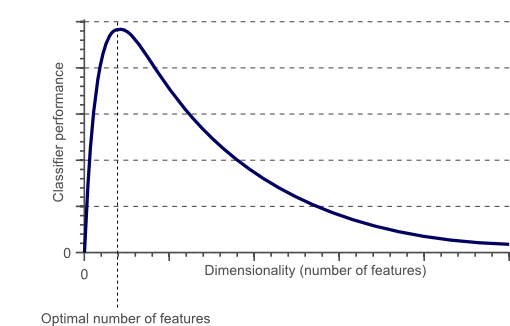

Correlated features can cause the Multicollinearity problem in model prediction
"Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model"

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.
For example, let’s assume that in the following linear equation:

Y = W0+W1*X1+W2*X2

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.


### Pearson’s correlation

Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient: Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression. Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:

==>1 indicates a strong positive relationship.

==>-1 indicates a strong negative relationship.

==>A result of zero indicates no relationship at
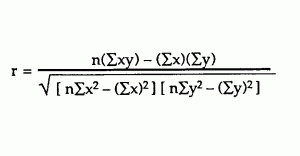

In [36]:
x_train_unique.shape

(1600, 200)

In [37]:
corrmat = x_train_unique.corr()

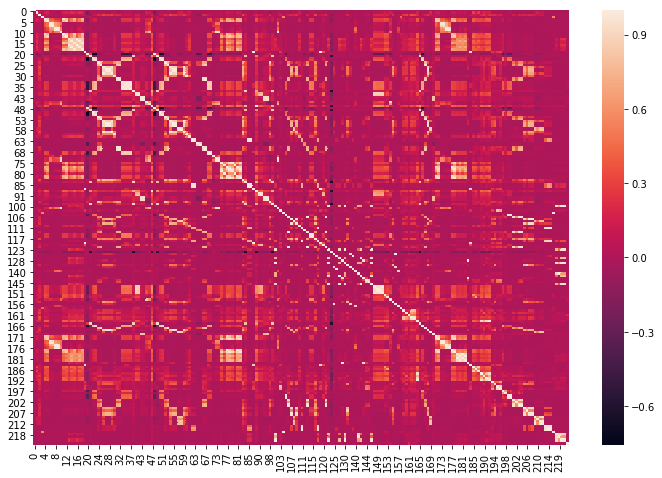

In [38]:
#corrmat
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [39]:
#corrmat.columns
corrmat

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,218,219,220,221,222
0,1.000000,-0.027387,-0.006389,0.035624,0.031820,0.014071,0.022963,0.023790,0.031051,0.028532,...,0.007409,-0.017482,-0.015821,-0.016693,-0.002554,-0.040836,-0.030185,-0.043733,-0.043562,-0.011098
1,-0.027387,1.000000,0.129309,-0.003721,0.162310,0.183237,0.026635,0.027339,-0.002888,-0.002831,...,0.093521,-0.002286,-0.002963,-0.002895,-0.002054,-0.002733,-0.002054,-0.002894,-0.002879,-0.006643
2,-0.006389,0.129309,1.000000,0.039272,0.094338,0.098071,0.041147,0.033639,0.020170,0.018505,...,0.122776,-0.021590,-0.026059,-0.024925,0.042111,0.009685,0.001744,0.015735,0.016210,-0.006950
3,0.035624,-0.003721,0.039272,1.000000,0.084736,0.044504,-0.004283,-0.003979,-0.003148,-0.003086,...,-0.006308,-0.002492,-0.003230,-0.003156,0.557516,-0.002979,-0.002239,-0.003155,-0.003139,-0.026085
4,0.031820,0.162310,0.094338,0.084736,1.000000,0.871544,0.388872,0.368375,0.242827,0.216412,...,-0.014652,-0.005787,-0.007501,-0.007330,0.040981,-0.006920,-0.005200,-0.007327,-0.007290,-0.013012
5,0.014071,0.183237,0.098071,0.044504,0.871544,1.000000,0.461634,0.486729,0.353066,0.318066,...,-0.013285,-0.005355,-0.006930,-0.006768,0.018469,0.004181,0.006882,0.000722,0.000344,-0.008666
6,0.022963,0.026635,0.041147,-0.004283,0.388872,0.461634,1.000000,0.952657,0.654590,0.583456,...,-0.003371,-0.001331,-0.001726,-0.001687,-0.001196,-0.001592,-0.001196,-0.001686,-0.001677,-0.004132
7,0.023790,0.027339,0.033639,-0.003979,0.368375,0.486729,0.952657,1.000000,0.684399,0.603892,...,-0.003132,-0.001237,-0.001603,-0.001567,-0.001111,-0.001479,-0.001111,-0.001566,-0.001558,-0.003413
8,0.031051,-0.002888,0.020170,-0.003148,0.242827,0.353066,0.654590,0.684399,1.000000,0.993255,...,-0.002478,-0.000979,-0.001268,-0.001240,-0.000879,-0.001170,-0.000879,-0.001239,-0.001233,-0.010453
9,0.028532,-0.002831,0.018505,-0.003086,0.216412,0.318066,0.583456,0.603892,0.993255,1.000000,...,-0.002429,-0.000959,-0.001244,-0.001215,-0.000862,-0.001147,-0.000862,-0.001215,-0.001208,-0.011169


In [40]:
def get_correlation(data,threshold):
    cor_columns = set()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j])>threshold:
                col = corrmat.columns[i]
                cor_columns.add(col)
    return cor_columns

In [41]:
cor_features = get_correlation(x_train_unique,.85)

In [42]:
cor_features

{5,
 7,
 9,
 11,
 12,
 14,
 16,
 17,
 18,
 23,
 27,
 28,
 29,
 32,
 34,
 35,
 37,
 39,
 41,
 44,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 63,
 65,
 66,
 67,
 68,
 70,
 73,
 74,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 89,
 91,
 93,
 96,
 99,
 102,
 108,
 109,
 113,
 115,
 118,
 119,
 122,
 123,
 127,
 130,
 138,
 139,
 142,
 143,
 145,
 147,
 148,
 149,
 150,
 151,
 154,
 156,
 157,
 163,
 165,
 166,
 167,
 168,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 187,
 189,
 191,
 192,
 196,
 199,
 200,
 201,
 203,
 204,
 205,
 206,
 207,
 208,
 211,
 212,
 213,
 214,
 215,
 216,
 218,
 219,
 220,
 221}

In [43]:
x_train_uncorr = x_train_unique.drop(labels=cor_features,axis=1)
x_test_uncorr = x_test_unique.drop(labels=cor_features,axis=1)

In [44]:
x_train_uncorr.shape


(1600, 79)

In [45]:
%%time
run_classifier(x_train_uncorr,x_test_uncorr,y_train,y_test)

Accuracy: 
0.9625
Wall time: 429 ms


In [46]:
%%time
run_classifier(x_train,x_test,y_train,y_test)

Accuracy: 
0.9575
Wall time: 454 ms


In [47]:
(508-459)*100/508

9.645669291338583

### Feature Grouping and Feature importance

In [48]:
#corrmat

In [49]:
corrdata = corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.027387
     2      0.006389
     3      0.035624
     4      0.031820
     5      0.014071
     6      0.022963
     7      0.023790
     8      0.031051
     9      0.028532
     10     0.009848
     11     0.025147
     12     0.003211
     13     0.014542
     14     0.014081
     15     0.023050
     16     0.016880
     17     0.015664
     18     0.021415
     19     0.040796
     20     0.000646
     21     0.020471
     22     0.003545
     23     0.001297
     24     0.006445
     25     0.004761
     26     0.003260
     27     0.002797
     28     0.002794
     29     0.003258
              ...   
222  192    0.001226
     193    0.001938
     194    0.005056
     195    0.002649
     196    0.001101
     197    0.008764
     198    0.007965
     199    0.003237
     200    0.002471
     201    0.004474
     202    0.013154
     203    0.006661
     204    0.004274
     205    0.006137
     206    0.004294
     207    0.007914
     208    0

In [50]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

142  127    1.000000e+00
127  142    1.000000e+00
139  126    1.000000e+00
126  139    1.000000e+00
125  156    1.000000e+00
156  125    1.000000e+00
25   53     1.000000e+00
53   25     1.000000e+00
130  100    1.000000e+00
100  130    1.000000e+00
66   31     1.000000e+00
31   66     1.000000e+00
30   60     1.000000e+00
60   30     1.000000e+00
119  87     1.000000e+00
87   119    1.000000e+00
183  128    1.000000e+00
128  183    1.000000e+00
141  219    1.000000e+00
219  141    1.000000e+00
151  151    1.000000e+00
147  147    1.000000e+00
148  148    1.000000e+00
149  149    1.000000e+00
150  150    1.000000e+00
162  162    1.000000e+00
157  157    1.000000e+00
152  152    1.000000e+00
161  161    1.000000e+00
156  156    1.000000e+00
                ...     
193  74     2.426829e-05
74   193    2.426829e-05
180  143    1.804915e-05
143  180    1.804915e-05
198  82     1.798243e-05
82   198    1.798243e-05
117  104    1.718272e-05
104  117    1.718272e-05
117  216    1.718272e-05


In [51]:
type(corrdata)

pandas.core.series.Series

In [52]:
corrdata = corrdata[corrdata>.85]
corrdata = corrdata[corrdata<1]

corrdata

In [53]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['Features1','Features2','Corr_value']

In [54]:
#corrdata

In [55]:
grouped_feature_list =[]
correlated_groups_list =[]
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        corr_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(corr_block.Features2.unique())+ [feature]
        correlated_groups_list.append(corr_block)


In [56]:
len(grouped_feature_list)

187

In [57]:
len(correlated_groups_list)

54

In [58]:
x_train_uncorr.shape
correlated_groups_list

[     Features1  Features2  Corr_value
 0           22         50    1.000000
 439         22         23    0.880913
 443         22         51    0.880913,      Features1  Features2  Corr_value
 2           67         32    1.000000
 266         67         31    0.932090
 273         67         66    0.932090
 513         67         25    0.854618
 515         67         53    0.854618,    Features1  Features2  Corr_value
 4        216        104         1.0,      Features1  Features2  Corr_value
 6           55         27    1.000000
 89          55         28    0.984542
 94          55         56    0.984542
 146         55        168    0.971592
 340         55         26    0.906471
 412         55         29    0.889905
 464         55         59    0.872808
 501         55         54    0.858043,     Features1  Features2  Corr_value
 12         80         76    0.999639,      Features1  Features2  Corr_value
 14         182        180    0.999309
 411        182        181    0

Now we have 54 correlated groups and we will add 54 more features to the x_train_uncorr taking each features from every groups.
We have to findout feature importance for each group.

### Feature importance:

In [59]:
imp_features = []

for group in correlated_groups_list:
    features = list(group.Features1.unique())+list(group.Features2.unique())
    rf  = RandomForestClassifier(n_estimators=100,random_state=0)
    rf.fit(x_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)],axis=1)
    importance.columns=['Features','Importance']
    importance.sort_values(by='Importance',ascending = False,inplace=True)
    feat = importance.iloc[0]
    imp_features.append(feat)

In [60]:
imp_features

[Features      51.000000
 Importance     0.276367
 Name: 3, dtype: float64, Features      25.000000
 Importance     0.327372
 Name: 4, dtype: float64, Features      216.00000
 Importance      0.54386
 Name: 0, dtype: float64, Features      168.000000
 Importance      0.408319
 Name: 4, dtype: float64, Features      80.000000
 Importance     0.512289
 Name: 0, dtype: float64, Features      180.000000
 Importance      0.401623
 Name: 1, dtype: float64, Features      100.000000
 Importance      0.229885
 Name: 2, dtype: float64, Features      14.000000
 Importance     0.369034
 Name: 0, dtype: float64, Features      82.000000
 Importance     0.208105
 Name: 3, dtype: float64, Features      192.00000
 Importance      0.36962
 Name: 0, dtype: float64, Features      114.000000
 Importance      0.502836
 Name: 1, dtype: float64, Features      207.00000
 Importance      0.24324
 Name: 1, dtype: float64, Features      165.000000
 Importance      0.489646
 Name: 2, dtype: float64, Features      

In [61]:
imp_features =  pd.DataFrame(imp_features)

In [62]:
imp_features.reset_index(inplace=True,drop=True)

In [63]:
#imp_features

In [64]:
feat_to_consider = set(imp_features['Features'])


In [65]:
feat_to_discard = set(cor_features)-set(feat_to_consider)

In [66]:
feat_to_discard = list(feat_to_discard)

In [67]:
x_train_grpd_uncor = x_train_unique.drop(labels=feat_to_discard, axis=1)
x_train_grpd_uncor.shape

(1600, 109)

In [68]:
x_test_grpd_uncor = x_test_unique.drop(labels=feat_to_discard, axis=1)
x_test_grpd_uncor.shape

(400, 109)

In [69]:
%%time
run_classifier(x_train_uncorr,x_test_uncorr,y_train,y_test)

Accuracy: 
0.9625
Wall time: 639 ms


In [70]:
%%time
run_classifier(x_train_grpd_uncor,x_test_grpd_uncor,y_train,y_test)

Accuracy: 
0.9575
Wall time: 563 ms


In [71]:
%%time
run_classifier(x_train,x_test,y_train,y_test)

Accuracy: 
0.9575
Wall time: 578 ms
